In [2]:
import datetime

print("investigator: Thomas Walle\n")
print('date:')
print(datetime.datetime.now())

# Which python
import sys



investigator: Thomas Walle

date:
2021-02-17 05:33:30.965646


In [ ]:
#directory path with source data
DATA_DIR = 

In [ ]:
sys.path[2]

In [3]:
# scanpy packages 
import scanpy as sc
import scanpy.external as sce
import anndata as anndata
from anndata import AnnData
import time
import os
import numpy as np
import seaborn as sns
import pandas as pd
import re
import h5py
from copy import deepcopy
from colors import rgb, hex
import scipy.cluster.hierarchy as hc
import scipy as scipy
from scipy.stats import ttest_ind
from scipy.sparse import csr_matrix
import colors as colors

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches
import matplotlib.colors as colors
import matplotlib.font_manager
from matplotlib import rcParams


import glob
from collections import OrderedDict
from scipy.sparse import csr_matrix
import scipy.stats
from statistics import median
from statistics import mean
from scanpy.external.pp import magic
from kneed import KneeLocator
import doubletdetection
import gseapy as gp


In [4]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to had
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

seaborn==0.11.0
scipy==1.5.3
scanpy==1.6.0
pandas==1.0.3
numpy==1.18.1
matplotlib==3.1.3
magic==0.1.1
kneed==0.7.0
h5py==2.10.0
gseapy==0.9.17
doubletdetection==2.5.2
diffxpy==0.7.4
anndata==0.7.4


In [5]:
# FUNCTIONS

# Randomize cells for plotting UMAP
def randomize_cells(anndata_object):
    
    "Randomize cells for plotting UMAP"
    
    index_list = np.arange(anndata_object.shape[0])
    np.random.shuffle(index_list)
    anndata_object = anndata_object[index_list]
    
    return anndata_object

In [6]:
# define colors

sc.set_figure_params(scanpy=True, dpi=80, dpi_save=80, frameon=False, vector_friendly=True, fontsize=7, figsize=(10,10), color_map=None, format='pdf', facecolor=None, transparent=True, ipython_format='png2x')
sns.set_style('white')

color_map_clusters = ["#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
"#FFDBE5", "#7A4900", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
"#5A0007", "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
"#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
"#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F",
"#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09",
"#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66",
"#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C",
"#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81",
"#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00",
"#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700",
"#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329",
"#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C"]

godsnot_64 = [
    # "#000000",  # remove the black, as often, we have black colored annotation
    "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
    "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
    "#5A0007", "#809693", "#6A3A4C", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
    "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
    "#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F",
    "#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09",
    "#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66",
    "#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C",
    "#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81",
    "#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00",
    "#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700",
    "#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329",
    "#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72"]

color_map_bimodal = ['#e1e1e1','#FF4A46']

color_map_clusters_plt = cm = LinearSegmentedColormap.from_list(
        'color_map_clusters', color_map_clusters)

# run doubletdetection on empty droplet free raw data

## load data

In [7]:
#path for empty droplet free data
adata_path = DATA_DIR + '2021_PDAC_RT_Huber_Walle_raw_data_annotated_emptydrops_noribo_nomito_clustered_nodrops.h5ad'

#indicate folder to put doubletdetection output in. see cell number 17 how the file path is concatenated exactly
csv_save_path = DATA_DIR + 'PAAD_Peng_Sun-X-10.1038s41422-019-0195-y-X-normal_samples_raw_filtered_normalized_log1p_clustered_nodrop_barcodes_revised_final'

In [8]:
adata_nodrops = sc.read(adata_path)
adata_nodrops

AnnData object with n_obs × n_vars = 157310 × 20962
    obs: 'batch', 'primary_tumor', 'LogProb_emptydrops', 'PValue_emptydrops', 'FDR_emptydrops', 'Limited', 'total_molecules', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'percent_mito', 'n_counts', 'pheno', 'true_cell_emptydrops', 'empty_droplet_sig'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'Limited_colors', 'batch_colors', 'neighbors', 'pca', 'pheno_colors', 'true_cell_emptydrops_colors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [9]:
adata_nodrops#set X to raw
adata_nodrops.X = adata_nodrops.raw[adata_nodrops.obs_names, adata_nodrops.var_names].X
print(adata_nodrops.X)

  (0, 14082)	1.0
  (0, 14771)	1.0
  (0, 11063)	1.0
  (0, 20463)	1.0
  (0, 6176)	1.0
  (0, 11956)	2.0
  (0, 19441)	2.0
  (0, 13602)	1.0
  (0, 7185)	1.0
  (0, 17547)	1.0
  (0, 5321)	1.0
  (0, 17316)	1.0
  (0, 8162)	6.0
  (0, 1200)	1.0
  (0, 9892)	115.0
  (0, 11098)	8.0
  (0, 10891)	1.0
  (0, 10614)	1.0
  (0, 7523)	1.0
  (0, 2316)	1.0
  (0, 1301)	1.0
  (0, 1628)	1.0
  (0, 16029)	2.0
  (0, 1271)	4.0
  (0, 13120)	1.0
  :	:
  (157309, 16406)	1.0
  (157309, 1376)	1.0
  (157309, 4663)	1.0
  (157309, 13105)	1.0
  (157309, 19790)	2.0
  (157309, 5806)	1.0
  (157309, 18773)	3.0
  (157309, 1380)	1.0
  (157309, 7117)	2.0
  (157309, 1436)	1.0
  (157309, 2995)	1.0
  (157309, 12539)	1.0
  (157309, 3013)	4.0
  (157309, 16812)	3.0
  (157309, 3587)	2.0
  (157309, 19452)	1.0
  (157309, 16076)	1.0
  (157309, 10832)	1.0
  (157309, 9780)	1.0
  (157309, 8558)	2.0
  (157309, 13766)	1.0
  (157309, 8790)	1.0
  (157309, 6274)	1.0
  (157309, 13599)	1.0
  (157309, 3309)	1.0


In [10]:
batches = set(adata_nodrops.obs["batch"])
sorted(batches)

['N01',
 'N02',
 'N03',
 'N04',
 'N05',
 'N06',
 'N07',
 'N08',
 'N09',
 'N10',
 'N11',
 'T01',
 'T02',
 'T03',
 'T04',
 'T06',
 'T07',
 'T08',
 'T09',
 'T10',
 'T11',
 'T12',
 'T13',
 'T14',
 'T15',
 'T16',
 'T17',
 'T18',
 'T19',
 'T20',
 'T21',
 'T22',
 'T23',
 'T24']

In [ ]:
#use doublet detection Jonathan Shor package https://github.com/JonathanShor/DoubletDetection.git
#import 
clf = doubletdetection.BoostClassifier()

#fix keyword probem with scanpy DoubletDetection incompatibility
clf.phenograph_parameters.pop('verbosity')

for batch in sorted(batches):
    labels = clf.fit(adata_nodrops[adata_nodrops.obs["batch"] == batch].X).predict(p_thresh=1e-16, voter_thresh=0.5)
    #retrieve indices
    index = adata_nodrops[adata_nodrops.obs['batch']==batch].obs_names
    doublets_df = pd.DataFrame({
    "index":
    index,
    "call":
    pd.Series(labels).replace([0.0, 1.0, np.nan],
                              ["01_singlet", "02_doublet", "03_ambigous"])
    })
    doublets_df.set_index("index", inplace=True)
    save_path = csv_save_path + '_' + batch +'.csv'
    doublets_df.to_csv(save_path)
    print('saved batch:',batch, ', to:', save_path)

## concatenate doubletdetection output of normal and tumor samples

In [11]:
#paths

#identical to csv_save_path above
files_path = "/data/peer/wallet/Jupyter/PAAD-X-Peng_Sun-X-2019-X-10.1038s41422-019-0195-y-X-Jupyter/output_data/PAAD_Peng_Sun-X-10.1038s41422-019-0195-y-X-normal_samples_raw_filtered_normalized_log1p_clustered_nodrop_barcodes_revised_final"


adata_path = '/data/peer/wallet/Jupyter/PAAD-X-Peng_Sun-X-2019-X-10.1038s41422-019-0195-y-X-Jupyter/output_data/2021_PDAC_RT_Huber_Walle_raw_data_annotated_emptydrops_noribo_nomito_clustered_nodrops.h5ad'
save_path_adata = '/data/peer/wallet/Jupyter/PAAD-X-Peng_Sun-X-2019-X-10.1038s41422-019-0195-y-X-Jupyter/output_data/2021_PDAC_RT_Huber_Walle_raw_data_annotated_emptydrops_noribo_nomito_clustered_nodrops_doublets.h5ad'

In [12]:
#add wildcard to path
files_path = files_path + '_*.csv'

In [13]:
files = glob.glob(files_path)
sorted(files)

['/data/peer/wallet/Jupyter/PAAD-X-Peng_Sun-X-2019-X-10.1038s41422-019-0195-y-X-Jupyter/output_data/PAAD_Peng_Sun-X-10.1038s41422-019-0195-y-X-normal_samples_raw_filtered_normalized_log1p_clustered_nodrop_barcodes_revised_final_N01.csv',
 '/data/peer/wallet/Jupyter/PAAD-X-Peng_Sun-X-2019-X-10.1038s41422-019-0195-y-X-Jupyter/output_data/PAAD_Peng_Sun-X-10.1038s41422-019-0195-y-X-normal_samples_raw_filtered_normalized_log1p_clustered_nodrop_barcodes_revised_final_N02.csv',
 '/data/peer/wallet/Jupyter/PAAD-X-Peng_Sun-X-2019-X-10.1038s41422-019-0195-y-X-Jupyter/output_data/PAAD_Peng_Sun-X-10.1038s41422-019-0195-y-X-normal_samples_raw_filtered_normalized_log1p_clustered_nodrop_barcodes_revised_final_N03.csv',
 '/data/peer/wallet/Jupyter/PAAD-X-Peng_Sun-X-2019-X-10.1038s41422-019-0195-y-X-Jupyter/output_data/PAAD_Peng_Sun-X-10.1038s41422-019-0195-y-X-normal_samples_raw_filtered_normalized_log1p_clustered_nodrop_barcodes_revised_final_N04.csv',
 '/data/peer/wallet/Jupyter/PAAD-X-Peng_Sun-X-20

In [14]:
adata_nodrops = sc.read(adata_path)
adata_nodrops

AnnData object with n_obs × n_vars = 157310 × 20962
    obs: 'batch', 'primary_tumor', 'LogProb_emptydrops', 'PValue_emptydrops', 'FDR_emptydrops', 'Limited', 'total_molecules', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'percent_mito', 'n_counts', 'pheno', 'true_cell_emptydrops', 'empty_droplet_sig'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'Limited_colors', 'batch_colors', 'neighbors', 'pca', 'pheno_colors', 'true_cell_emptydrops_colors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [15]:
#concatenate doubletdetection outputs
file_list = []
for i in files:
    doublets = pd.read_csv(i,sep=',', index_col='index')
    file_list.append(doublets)

In [16]:
#concatenate tumor and normal dataframes
doublets_df = pd.concat(file_list)
doublets_df

,call
index,
236785384151899-T20,01_singlet
196019732990835-T20,01_singlet
205922700847412-T20,01_singlet
231692926905643-T20,01_singlet
204351817279222-T20,01_singlet
...,...
236288407386996-N07,01_singlet
122436474497828-N07,01_singlet
122310398273827-N07,01_singlet


In [17]:
#show doublet percentage
doublets_df['call'].value_counts(normalize=True)

01_singlet     0.972545
02_doublet     0.027277
03_ambigous    0.000178
Name: call, dtype: float64

In [18]:
#percentage doublets
doublets_df['call'].value_counts()

01_singlet     152991
02_doublet       4291
03_ambigous        28
Name: call, dtype: int64

In [19]:
#add to adata
adata_nodrops.obs["doublets"] = doublets_df

In [20]:
adata_nodrops.write(save_path_adata)


... storing 'doublets' as categorical


## remove doublets

In [21]:
adata_path = DATA_DIR + '2021_PDAC_RT_Huber_Walle_raw_data_annotated_emptydrops_noribo_nomito_clustered_nodrops_doublets.h5ad'
save_path_adata = DATA_DIR + '2021_PDAC_RT_Huber_Walle_raw_data_annotated_emptydrops_noribo_nomito_clustered_nodrops_doublets_nodoubs.h5ad'

In [22]:
adata_nodrops_nodub = sc.read(adata_path)
adata_nodrops_nodub

AnnData object with n_obs × n_vars = 157310 × 20962
    obs: 'batch', 'primary_tumor', 'LogProb_emptydrops', 'PValue_emptydrops', 'FDR_emptydrops', 'Limited', 'total_molecules', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'percent_mito', 'n_counts', 'pheno', 'true_cell_emptydrops', 'empty_droplet_sig', 'doublets'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'Limited_colors', 'batch_colors', 'neighbors', 'pca', 'pheno_colors', 'true_cell_emptydrops_colors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [23]:
print('number of nan cells:', len(adata_nodrops_nodub[adata_nodrops_nodub.obs['doublets']=='03_ambiguous']))
print('number of doublet cells:', len(adata_nodrops_nodub[adata_nodrops_nodub.obs['doublets']=='02_doublet']))
print('number of singlet cells:', len(adata_nodrops_nodub[adata_nodrops_nodub.obs['doublets']=='01_singlet']))
print('nan containing samples:', set(adata_nodrops_nodub[adata_nodrops_nodub.obs['doublets']=='nan'].obs['batch']))
print('number of cells in tumor samples:', len(adata_nodrops_nodub[adata_nodrops_nodub.obs['primary_tumor']==True]))

number of nan cells: 0
number of doublet cells: 4291
number of singlet cells: 152991
nan containing samples: set()
number of cells in tumor samples: 102438


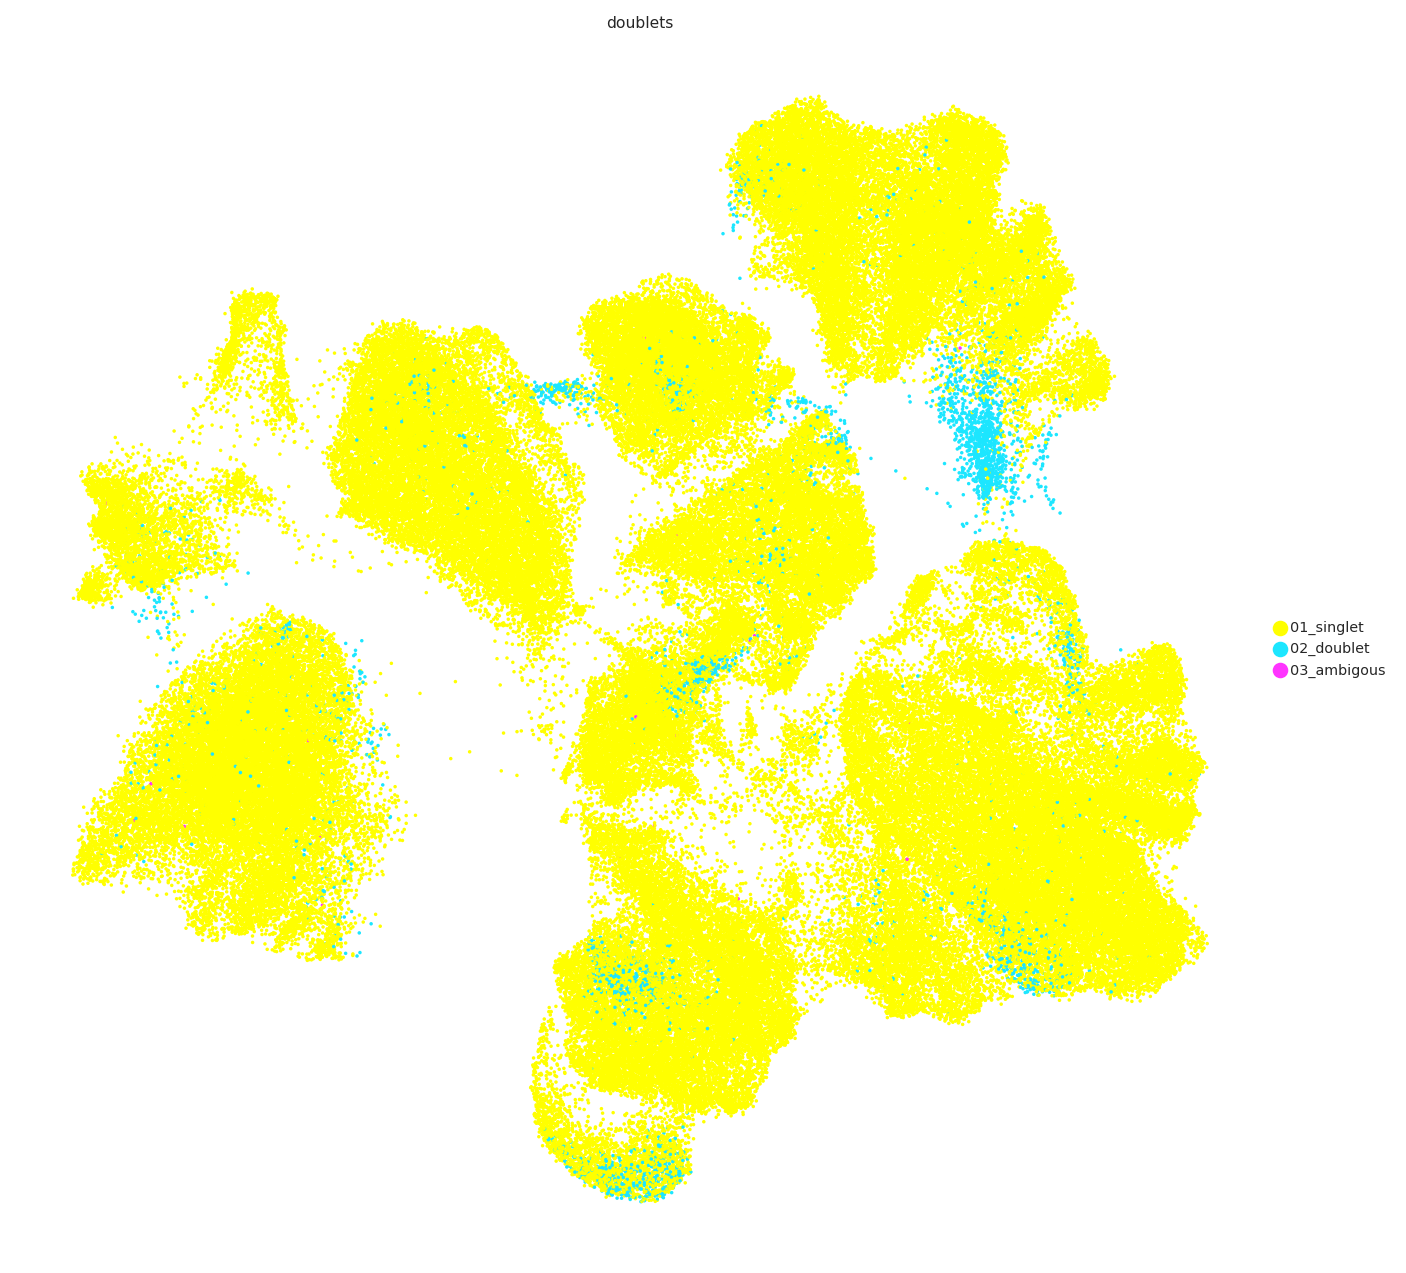

In [24]:
sc.pl.umap(adata_nodrops_nodub, color=['doublets'], palette= color_map_clusters , use_raw= False, s=10)

In [25]:
adata_nodrops_nodub = adata_nodrops_nodub[adata_nodrops_nodub.obs["doublets"]=='01_singlet']

In [26]:
adata_nodrops_nodub

View of AnnData object with n_obs × n_vars = 152991 × 20962
    obs: 'batch', 'primary_tumor', 'LogProb_emptydrops', 'PValue_emptydrops', 'FDR_emptydrops', 'Limited', 'total_molecules', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'percent_mito', 'n_counts', 'pheno', 'true_cell_emptydrops', 'empty_droplet_sig', 'doublets'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'Limited_colors', 'batch_colors', 'neighbors', 'pca', 'pheno_colors', 'true_cell_emptydrops_colors', 'umap', 'doublets_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

Trying to set attribute `.uns` of view, copying.


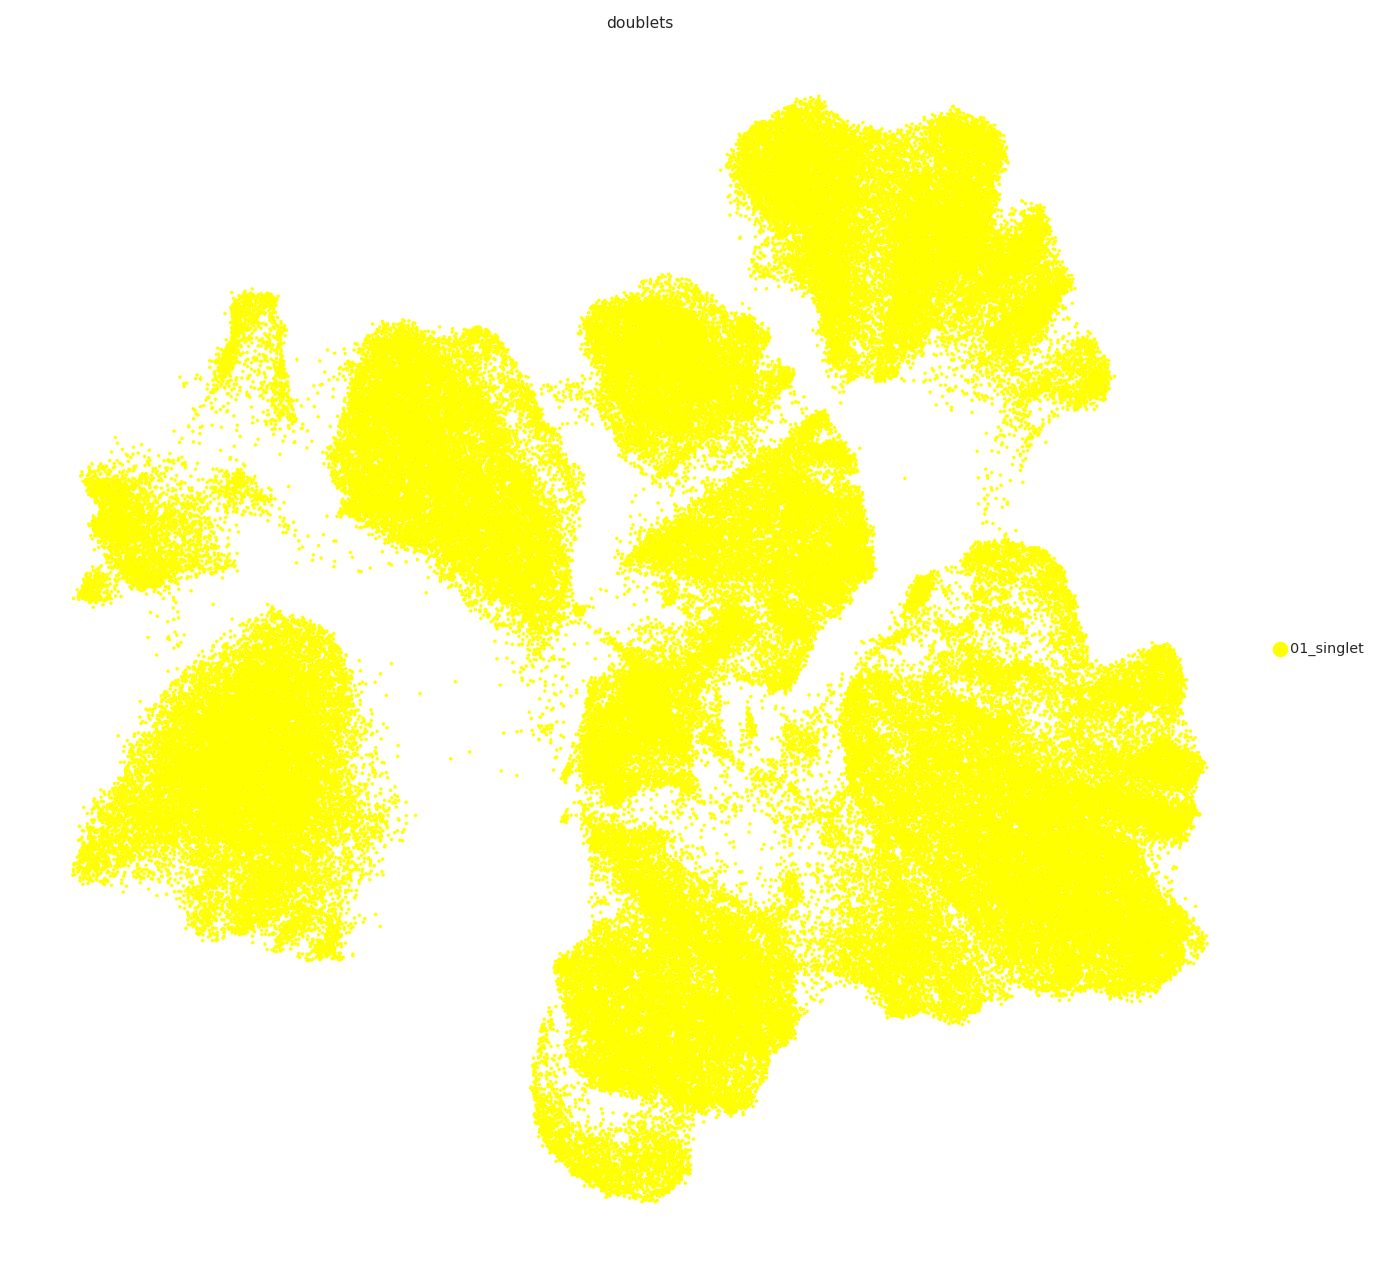

In [27]:
sc.pl.umap(adata_nodrops_nodub, color=['doublets'], palette= color_map_clusters , use_raw= False, s=10)

In [28]:
adata_nodrops_nodub.write(save_path_adata)